# Diversion

A diversion, sometimes called a “run-of-river” facility, channels a portion of a river through a canal and/or a penstock to utilize the natural decline of the river bed elevation to produce energy. A penstock is a closed conduit that channels the flow of water to turbines with water flow regulated by gates, valves, and turbines. A diversion may not require the use of a dam. Check [DOE - Types of Hydropower Plant](https://www.energy.gov/eere/water/types-hydropower-plants#:~:text=There%20are%20three%20types%20of,renewable%20energy%20to%20the%20grid.) for additional information. 

In diversion projects, HydroGenerate focuses on calculating hydropower under different configurations.

In [1]:
import sys
import os

sys.path.append(r"C:\python\HydroGenerate")  # Ensure HydroGenerate is found

# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
urllib3.disable_warnings()
# Import Hydrogenerate
from HydroGenerate.hydropower_potential import *
from HydroGenerate.summary_results import *


In [2]:
# 1) Flow is a single value.
# Head, power, and length of penstock are known. 
# In this scenario HydroGenerate will select a turbine, compute efficiency for the given flow
# and values within 0.6 to 1.2 the given flow, penstock diameter (assuming steel if no material is given),
# head loss for all flows, rater power,
# power a given range of flow, 

flow = 5000 # cfs
head = 330 # ft
power = None
penstock_length = 250 # ft
hp_type = 'Diversion'

# The following parameters can be included in the computation. Options are commented out when 
# calling calcualte_hp_potential

# a) The type of turbine used in the computation
# turbine_type = 'Pelton'

# b) The penstock material can be changes, Steel is the default. 
# penstock_material = 'Concrete'

# c) The headloss computation method can be changed. Darcy-Weisbach is the default method.
# headloss_method= "Hazen-Williams"
# C = 100 # Hazen_williamns C


hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                            penstock_headloss_calculation= True,
                            units= 'US',
                            hydropower_type= hp_type, penstock_length= penstock_length,
                            # penstock_material= penstock_material,
                            # penstock_frictionfactor= C,
                            max_headloss_allowed= 10)

# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Turbine type:', hp.turbine_type)
print('Rated Power (MW):', round(hp.rated_power/1000, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter,2))
print('Runner diameter (ft):', round(hp.runner_diameter,2))


Design flow (cfs): 5000.0
Turbine type: Francis
Rated Power (MW): 117.18
Net head (ft): 299.19
Generator Efficiency: 0.98
Head Loss method: Darcy-Weisbach
Penstock length (ft): 250.0
Penstock diameter (ft): 10.86
Runner diameter (ft): 14.0


[Click here](https://idaholabresearch.github.io/HydroGenerate/UserGuide_7_HydroGenerateWorkflow.html) for a full list of all inputs allowed in HydroGenerate and their definition.

#### Flow as Pandas dataframe with a datetime index - Additional functionality.

In [3]:
# 2) Using flow as a pandas dataframe and adding annual energy calculation

# Note: When using a pandas dataframe as flow data, please set the datetime index before 
# using HydroGenerate.  (https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)
data_path = r"C:\python\HydroGenerate\examples\data_test.csv"
flow = pd.read_csv(data_path) # pandas data frame
flow['dateTime'] = pd.to_datetime(flow['dateTime']) # preprocessing convert to datetime
flow = flow.set_index('dateTime') # set datetime index # flolw is in cfs

head = 20 # ft
power = None
penstock_length = 50 # ft
hp_type = 'Diversion' 
pctime_runfull = 30 # Percent of time a plant runs full. Visit: https://idaholabresearch.github.io/HydroGenerate/Theory_2_Design_Flow.html 
# For more information about design flow calculation

hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                            pctime_runfull = pctime_runfull,
                            penstock_headloss_calculation= True,
                            design_flow= None,
                            electricity_sell_price = 0.05,
                            resource_category= 'CanalConduit',
                            hydropower_type= hp_type, penstock_length= penstock_length,
                            flow_column= 'discharge_cfs', annual_caclulation= True)

pd.set_option('display.max_columns', 10) # 
pd.set_option('display.width', 1000)

# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Head_loss at design flow (ft):', round(hp.penstock_design_headloss, 2))
print('Turbine type:', hp.turbine_type)
print('Rated Power (Kw):', round(hp.rated_power, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter,2))
print('Runner diameter (ft):', round(hp.runner_diameter,2))

print('\nResource Category:', hp.resource_category)
print('Initial Capital Cost (M$):', np.round(hp.icc,1))
print('Annual Operation and Maintennance (M$):', np.round(hp.annual_om,1))

print('\nPandas dataframe output: \n', hp.dataframe_output.head())
print('Annual output: \n', hp.annual_dataframe_output.head())

Design flow (cfs): 9620.0
Head_loss at design flow (ft): 1.96
Turbine type: Kaplan
Rated Power (Kw): 13142.39
Net head (ft): 18.04
Generator Efficiency: 0.98
Head Loss method: Darcy-Weisbach
Penstock length (ft): 50.0
Penstock diameter (ft): 17.75
Runner diameter (ft): 19.08

Resource Category: CanalConduit
Initial Capital Cost (M$): 56.1
Annual Operation and Maintennance (M$): 0.9

Pandas dataframe output: 
                            discharge_cfs   site_id     power_kW  turbine_flow_cfs  efficiency   energy_kWh
dateTime                                                                                                  
2010-01-01 08:00:00+00:00         3260.0  11370500  4417.413411            3260.0    0.825791          NaN
2010-01-01 08:15:00+00:00         3270.0  11370500  4437.662487            3270.0    0.827097  1109.415622
2010-01-01 08:30:00+00:00         3250.0  11370500  4397.114770            3250.0    0.824469  1099.278692
2010-01-01 08:45:00+00:00         3270.0  11370500  

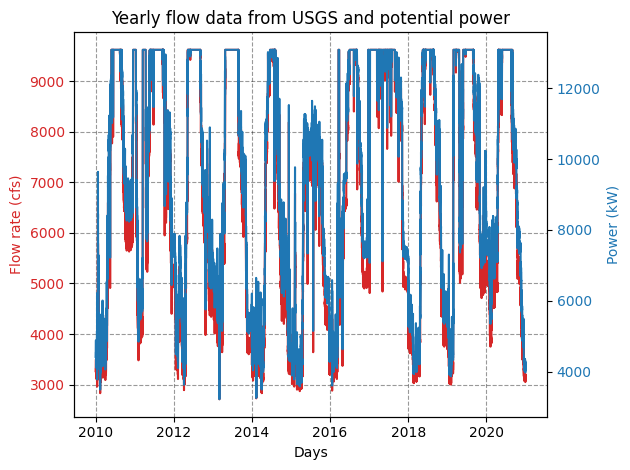

In [4]:
# Plot results using the output dataframe
df = hp.dataframe_output.copy()
fig, ax1 = plt.subplots()

color_plot = 'tab:red'
ax1.set_xlabel('Days')
ax1.set_ylabel('Flow rate (cfs)', color=color_plot)
ax1.plot(df['turbine_flow_cfs'], label="Flow rate", color=color_plot)
ax1.tick_params(axis='y', labelcolor=color_plot)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color_plot2 = 'tab:blue'
ax2.set_ylabel('Power (kW)', color=color_plot2)  # we already handled the x-label with ax1
ax2.plot(df['power_kW'],label="Power", color=color_plot2)
ax2.tick_params(axis='y', labelcolor=color_plot2)
ax1.grid(True, axis='both', color='k',linestyle='--',alpha=0.4)
plt.title("Yearly flow data from USGS and potential power")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### HG allows entering flow in different formats, including a single number, a numpy array, or a pandas dataframe as demostrated above. [Click here](https://idaholabresearch.github.io/HydroGenerate/UserGuide_3_FlowOptions.html#) for a full list of options. 

##### [Click here](https://idaholabresearch.github.io/HydroGenerate/UserGuide_4_QueryingDataUSGS-NWIS.html) to learn about querying data from the USUS National Water Information System directly into HG.

In [5]:
# Full list of parameters included in the HG output, run the next line of code:
dir(hp)

['Re',
 'Rm',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'annual_dataframe_output',
 'annual_maintenance_flag',
 'annual_om',
 'capacity_factor',
 'channel_average_velocity',
 'channel_design_headloss',
 'channel_headloss',
 'dataframe_output',
 'datetime_index',
 'design_efficiency',
 'design_flow',
 'designdiameter_calculator',
 'electricity_sell_price',
 'flow',
 'flow_column',
 'flowduration_curve',
 'generator_efficiency',
 'head',
 'head_loss',
 'hk_blade_diameter',
 'hk_blade_heigth',
 'hk_blade_type',
 'hk_swept_area',
 'hydropower_type',
 'icc',
 'major_maintenance_flag',
 'max_headloss_allowed',
 'minimum_turbineflow',
 'minimum_turbinef

##### Plotting functions

Hydrogenerate includes multiple functions that allow plotting key results based on flow analysis. 

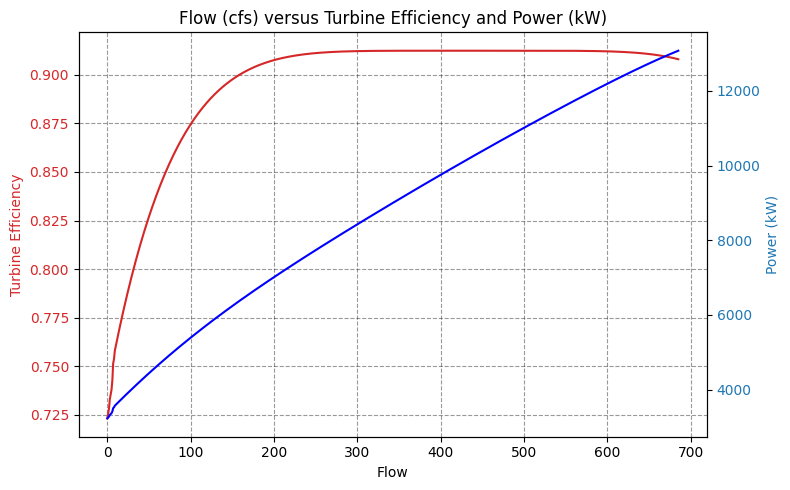

In [6]:
# Turbine efficiency and power as a function of flow
sys.path.append('/c:/python/HydroGenerate/HydroGenerate')
flow_efficiency_power_plot(hp)

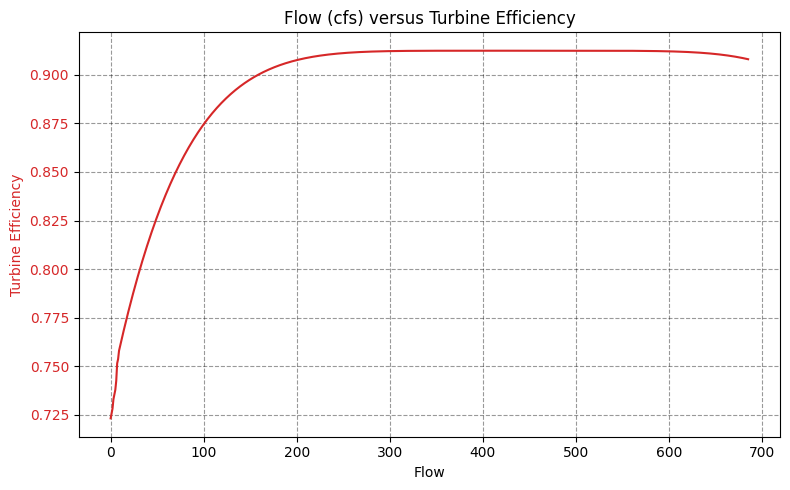

In [7]:
# Turbine efficiency versus flow
flow_efficiency_plot(hp)

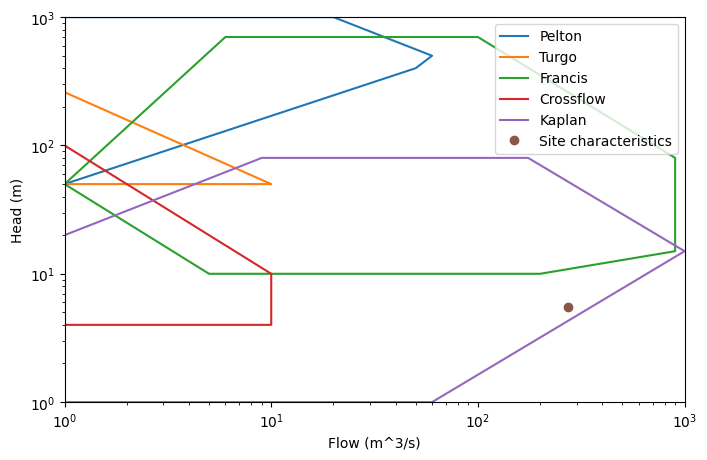

In [8]:
# Turbine selection based on head and design flow

# Turbine selction is automatically selected in HG by using the figure displayed here. To select a 
# different turbine, use turbine_type and select one of the esiting turbines
hp.units = 'US'
turbine_type_plot(hp)

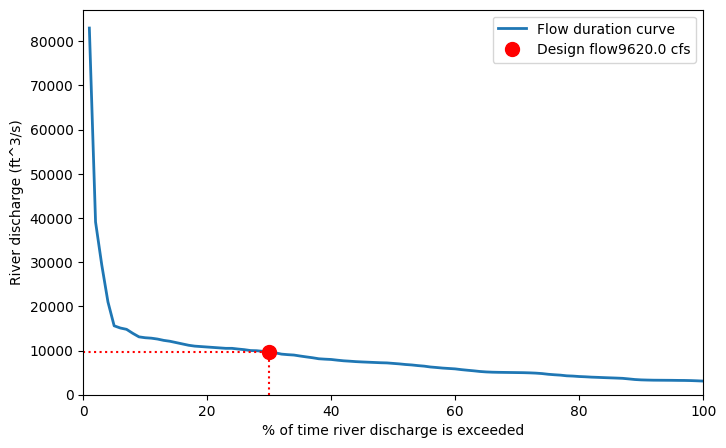

In [9]:
# Flow duration curve

# Changing the variable pctime_runfull allows user to evaluate different designs flow. The default is 30% (as observed below)
# Using design_flow achieves the same outcome. 

flow_duration_curve_plot(hp)

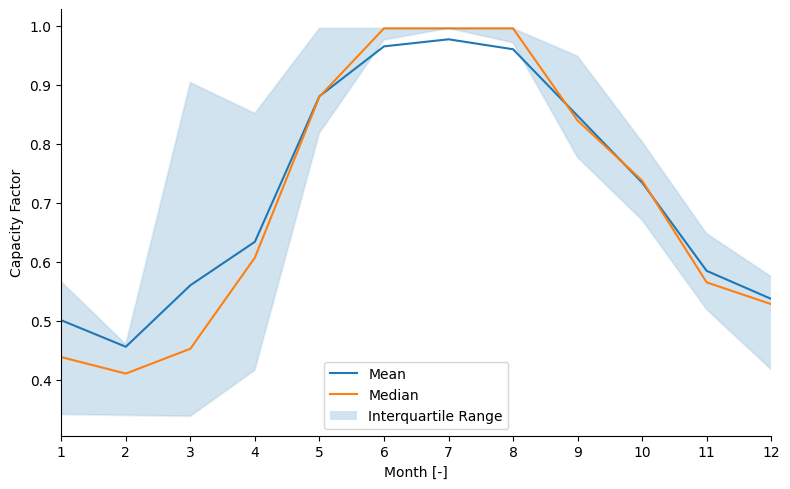

In [10]:
# Summary results - Capacity factor

plant_capfactor_plot(hp)

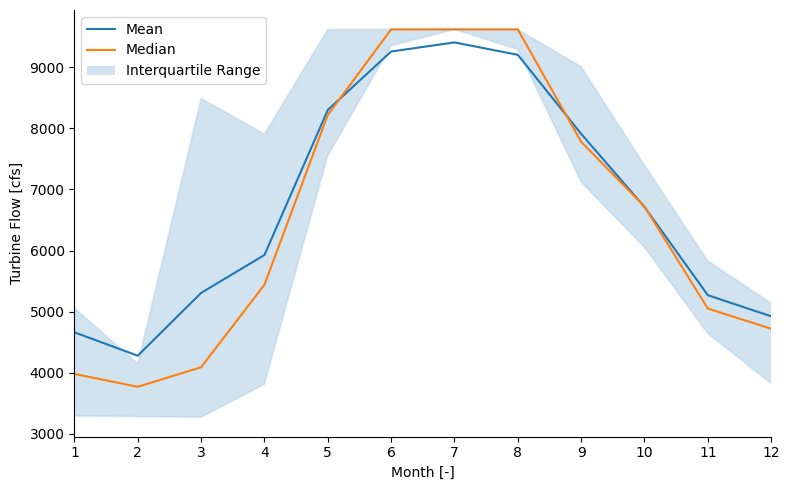

In [11]:
# Summary results - Turbine flow

plant_turbineflow_plot(hp)

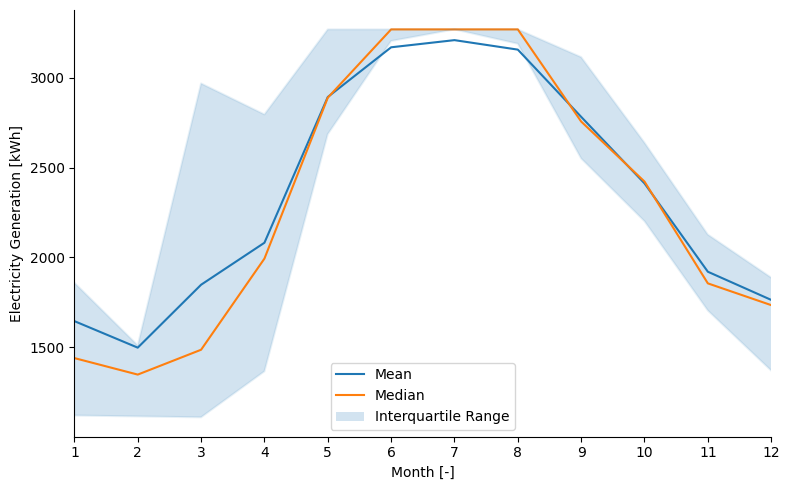

In [12]:
# Summary results - Generation

plant_elecgeneration_plot(hp)


In [13]:
# 2.3 HydroGenerate allows the user to specify flow constraints that denote annual and major maintenance (5 years):

# 1. Annual maintenance: the flow will be set to zero for **one week** in the month with the lowest average flow every year. 
# P parameter `annual_maintenance_flag`

# 2. Major maintenance: the flow will be set to zero for **two weeks** in the month with lowest average flow every 5 years. 
# Parameter `major_maintenance_flag`

# The user can specify the threshold of flow using the parameteres `minimum_turbineflow` for flow in absolute value, 
# or `minimum_turbineflow_percent` to specify a percentage of the design flow.

flow = pd.read_csv(data_path) # pandas data frame
flow['dateTime'] = pd.to_datetime(flow['dateTime']) # preprocessing convert to datetime
flow = flow.set_index('dateTime') # set datetime index # flow is in cfs
head = 20 # ft
power = None
penstock_length = 50 # ft
hp_type = 'Diversion' 


# minimum_turbineflow = 5000 # flow is in cfs
# minimum_turbineflow_percent = 80 # percent of design flow that can pass through the turbine



hp = calculate_hp_potential(flow= flow, flow_column='discharge_cfs', rated_power= power, head= head,
                                           hydropower_type= hp_type, penstock_length= penstock_length, 
                                          #  minimum_turbineflow = minimum_turbineflow, 
                                          #  minimum_turbineflow_percent = minimum_turbineflow_percent,
                                           annual_caclulation= True, 
                                           annual_maintenance_flag= True, 
                                           major_maintenance_flag= True)

C:\python\HydroGenerate\HydroGenerate\flow_preprocessing.py:153: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  week_maint = weekly.groupby("week").mean().idxmin()[0]
C:\python\HydroGenerate\HydroGenerate\flow_preprocessing.py:102: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  week_maint = weekly.groupby("week").mean().idxmin()[0]
